In [1]:
!date

Mon May  5 17:00:54 EDT 2025


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [3]:
import nbformat
import os
from tqdm import tqdm
import shutil
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pickle
def load_pickle(filename):
    with open(filename,"rb") as filehandler:
        dump = pickle.load(filehandler)
    return dump

In [5]:
model_names = ['conv_denoise',
'conv_denoise500',
'conv_denoise_bn',
'conv_denoise_large',
'conv_denoise_large500',
'conv_smooth',
'conv_smooth-small',
'conv_weights_unet_denoise',
'conv_weights_unet_denoise500',]
model_names.sort()

In [6]:
errors = []

In [7]:
indir = '../Data/StudyForrest/Stefano_adv_papermill/'

In [19]:
folders = [f for f in os.listdir(indir) if not f.startswith('.')]
folders.sort()
nfiles = [len( os.listdir(os.path.join(indir,folder)) ) for folder in folders]

In [25]:
sum(np.array(nfiles)>55)

18

In [26]:
for i in range(len(folders)):
    print(f'{folders[i]} | {nfiles[i]}')

new-stefano-conv-allSubs-rep-0 | 57
new-stefano-conv-allSubs-rep-1 | 57
new-stefano-conv-allSubs-rep-10 | 56
new-stefano-conv-allSubs-rep-11 | 57
new-stefano-conv-allSubs-rep-12 | 56
new-stefano-conv-allSubs-rep-13 | 56
new-stefano-conv-allSubs-rep-14 | 56
new-stefano-conv-allSubs-rep-15 | 56
new-stefano-conv-allSubs-rep-16 | 56
new-stefano-conv-allSubs-rep-17 | 56
new-stefano-conv-allSubs-rep-18 | 44
new-stefano-conv-allSubs-rep-2 | 56
new-stefano-conv-allSubs-rep-3 | 56
new-stefano-conv-allSubs-rep-4 | 57
new-stefano-conv-allSubs-rep-5 | 56
new-stefano-conv-allSubs-rep-6 | 56
new-stefano-conv-allSubs-rep-7 | 56
new-stefano-conv-allSubs-rep-8 | 56
new-stefano-conv-allSubs-rep-9 | 56


In [34]:
for rep in range(20):
    analysis_name = f'new-stefano-conv-allSubs-rep-{rep}'
    indir = '../Data/StudyForrest/Stefano_adv_papermill/'
    notebooks_dir = os.path.join(indir,analysis_name)
    notebooks = [f for f in os.listdir(notebooks_dir) if f.endswith('.ipynb')]
    notebooks.sort()
    n = len(notebooks)
    print(n)
    
    outputs_dir = os.path.join('../Data/StudyForrest/Stefano_adv_outputs/',analysis_name)
    if not os.path.exists(outputs_dir):
        os.mkdir(outputs_dir)
        
    for rep in tqdm([0]):
        analysis_name = f'new-stefano-conv-allSubs-rep-{rep}'
        indir = '../Data/StudyForrest/Stefano_adv_papermill/'
        notebooks_dir = os.path.join(indir,analysis_name)
        notebooks = [f for f in os.listdir(notebooks_dir) if f.endswith('.ipynb')]
        notebooks.sort()
        n = len(notebooks)
        for s in range(14):
            for r in [1,2,3,4]:
                notebook_path = os.path.join(notebooks_dir,f'ensembling-method-S{s}-R{r}.ipynb')
                if os.path.exists(notebook_path):
                    assert os.path.exists(notebook_path),'bad path'
                    with open(notebook_path, 'r', encoding='utf-8') as f:
                        notebook = nbformat.read(f, as_version=4)                    
                    target_outputs = []
                    for cell in notebook['cells']:
                        if cell['cell_type'] == 'code' and 'save_derivs(weights_ofn)' in cell['source']:
                            # Check if the cell has outputs
                            if 'outputs' in cell:
                                for output in cell['outputs']:
                                    # Extract the text output if available
                                    if output['output_type'] == 'stream' and 'text' in output and 'saved as' in output['text']:
                                        target_outputs.append(output['text'].replace("\n",'').replace('saved as: ',''))
                                        target_outputs.sort()
                    if len(target_outputs)==9:
                        for i in range(len(target_outputs)):
                            
                            target_name = target_outputs[i]
                            if os.path.exists(target_name):
                                src = target_name
                                dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.pickle')
                                shutil.copyfile(src,dst)
    
                            target_name = target_outputs[i].replace('.pickle','.nii.gz')
                            if os.path.exists(target_name):
                                src = target_name
                                dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.nii.gz')
                                shutil.copyfile(src,dst)
    
                            target_name = target_outputs[i].replace('.pickle','.weights')
                            if os.path.exists(target_name):
                                src = target_name
                                dst = os.path.join(outputs_dir,f'{model_names[i]}-S_{s}-R_{r}-rep_{rep}.weights')
                                shutil.copyfile(src,dst)

56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.70s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.72s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.14s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.01s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.04s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.01s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.18s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.06s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.04s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.99s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.08s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.09s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.07s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.11s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.58s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.56s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.69s/it]


56


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.62s/it]


45


100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.45s/it]


FileNotFoundError: [Errno 2] No such file or directory: '../Data/StudyForrest/Stefano_adv_papermill/new-stefano-conv-allSubs-rep-19'

In [41]:
outputs_dir

'../Data/StudyForrest/Stefano_adv_outputs/new-stefano-conv-allSubs-rep-18'

In [48]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [57]:
fn_temp = '../Data/StudyForrest/Stefano_adv_outputs/new-stefano-conv-allSubs-rep-{rep}/conv_weights_unet_denoise-S_{s}-R_{r}-rep_0.pickle'

In [65]:

#done_check = np.array([[all([os.path.exists(os.path.join(f'../Data/StudyForrest/Stefano_adv_outputs/new-stefano-conv-allSubs-rep-{rep}',f'{model_names[0]}-S_{s}-R_{r}-rep_{rep}.pickle')) for r in [1,2,3,4]]) for s in range(14)] for rep in range(11)])
done_check = np.array([[os.path.exists(fn_temp.format(s=s,r=4,rep=rep)) for s in range(14)] for rep in range(20)])


In [70]:
done_check.mean(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

Text(0.5, 0, 'repetition')

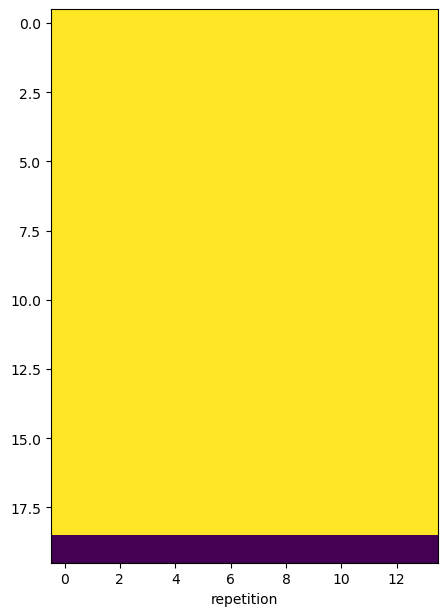

In [66]:
plt.figure(figsize=(5,15))
plt.imshow(done_check,vmin=0,vmax=1);
plt.xlabel('subject')
plt.xlabel('repetition')

In [71]:
import ants

In [72]:
nreps = 19

In [101]:
model_names

['conv_denoise',
 'conv_denoise500',
 'conv_denoise_bn',
 'conv_denoise_large',
 'conv_denoise_large500',
 'conv_smooth',
 'conv_smooth-small',
 'conv_weights_unet_denoise',
 'conv_weights_unet_denoise500']

In [78]:
fn_temp = '../Data/StudyForrest/Stefano_adv_outputs/new-stefano-conv-allSubs-rep-{rep}/{model}-S_{s}-R_{r}-rep_0.nii.gz'

In [102]:
for s in range(14):
    for r in [1,2,3,4]:
        for m in range(len(model_names)):
            ims = [ants.image_read(fn_temp.format(s=0,r=1,rep=0,model=model_names[m])) for rep in range(nreps)]
            arr_avg = np.average(np.array([im.numpy() for im in ims]),axis=0)
            arr_med = np.median(np.array([im.numpy() for im in ims]),axis=0)
            im_avg = ims[0].new_image_like(arr_avg)
            im_avg.to_filename(f'../Data/StudyForrest/Stefano_adv_outputs/01-signals_averaged/S{s}-R{r}-{model_names[m]}-avg.nii.gz')
            im_med = ims[0].new_image_like(arr_med)
            im_med.to_filename(f'../Data/StudyForrest/Stefano_adv_outputs/01-signals_averaged/S{s}-R{r}-{model_names[m]}-med.nii.gz')
            print(f'S{s}/R{r}/M{m}')

S0/R1/M0
S0/R1/M1
S0/R1/M2
S0/R1/M3
S0/R1/M4
S0/R1/M5
S0/R1/M6
S0/R1/M7
S0/R1/M8
S0/R2/M0
S0/R2/M1
S0/R2/M2
S0/R2/M3
S0/R2/M4
S0/R2/M5
S0/R2/M6
S0/R2/M7
S0/R2/M8
S0/R3/M0
S0/R3/M1
S0/R3/M2
S0/R3/M3
S0/R3/M4
S0/R3/M5
S0/R3/M6
S0/R3/M7
S0/R3/M8
S0/R4/M0
S0/R4/M1
S0/R4/M2
S0/R4/M3
S0/R4/M4
S0/R4/M5
S0/R4/M6
S0/R4/M7
S0/R4/M8
S1/R1/M0
S1/R1/M1
S1/R1/M2
S1/R1/M3


KeyboardInterrupt: 